In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm

import seaborn as sns; sns.set()

%matplotlib inline
import mpld3
mpld3.enable_notebook()
%pylab inline
pylab.rcParams['figure.figsize'] = (13, 7)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['hist', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [32]:
df = pd.read_pickle('data/1min_normalized_without_sO2.pkl')
df = df.reset_index()
df = df[pd.notnull(df).all(axis=1)]
df = df.reindex(np.random.permutation(df.index))
df.head()

,index,date,pressure,temperature,humidity,so2,h2s,h2s_ref,captor,0,...,5,6,7,8,9,10,11,12,13,14
15491,12223,2016-11-06 05:15:00,-1.68368,-2.474241,0.780534,0.4,"[-0.600134953455, -0.768739386793, -0.76873938...",1.347021,1304,-0.600135,...,-0.600135,-0.768739,-0.768739,-0.768739,-0.768739,-0.600135,-0.768739,-0.768739,-0.768739,-0.768739
13378,10110,2016-10-07 10:00:00,0.392143,-0.827724,-0.128368,0.0,"[-0.26292608678, -0.26292608678, -0.4315305201...",0.214708,1304,-0.262926,...,-0.094322,-0.262926,-0.262926,-0.262926,0.074283,-0.094322,-0.094322,-0.094322,-0.094322,-0.262926
4011,743,2016-06-01 02:15:00,-0.0526765,-1.013247,1.175131,0.0,"[0.242887213233, 0.074282779895, 0.07428277989...",-0.432328,1304,0.242887,...,0.242887,0.074283,0.242887,0.242887,0.580096,0.580096,0.074283,0.242887,0.411492,0.242887
11079,7811,2016-09-06 02:00:00,0.985236,0.308605,0.909111,0.4,"[-0.0943216534426, 0.074282779895, -0.26292608...",-0.108810,1304,-0.094322,...,-0.094322,-0.262926,-0.094322,-0.094322,-0.094322,-0.094322,0.074283,-0.094322,0.074283,0.074283
10505,7237,2016-08-30 21:30:00,0.68869,-0.039251,0.044545,0.8,"[-0.93734382013, -0.93734382013, -0.9373438201...",-0.432328,1304,-0.937344,...,-0.937344,-0.937344,-0.937344,-0.937344,-0.937344,-0.937344,-0.937344,-0.937344,-0.937344,-0.937344


In [33]:
def split_dataframe(dataframe, percent):
    nb_rows = int(np.floor(percent * len(dataframe)))
    return dataframe[:nb_rows], dataframe[nb_rows:]

def dataframe_to_xy(df):
    return (np.array(df[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, \
                         'pressure', 'temperature', 'humidity', ]]),\
            np.array(df['so2']))

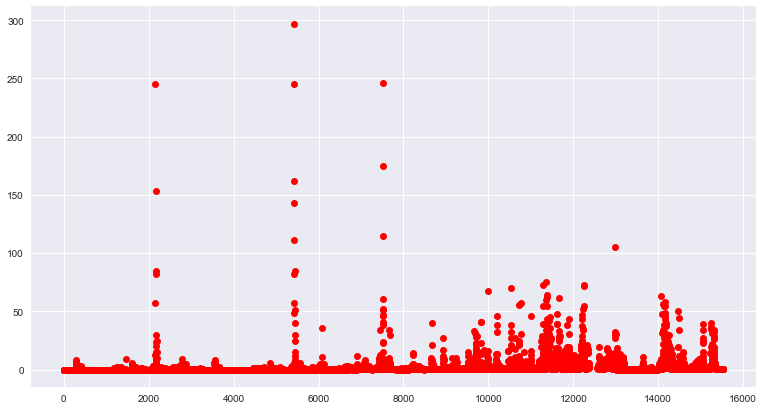

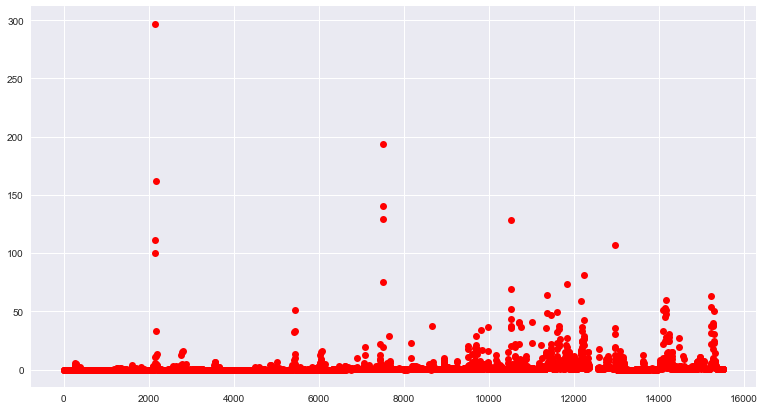

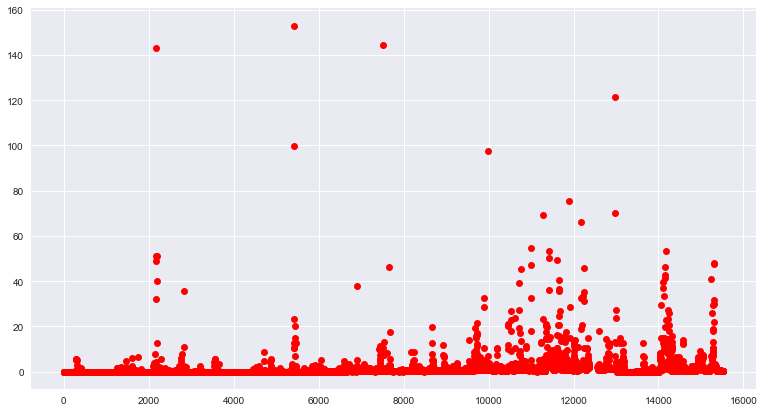

In [34]:
df_test, df_train = split_dataframe(df, 0.5) 
df_valid, df_test = split_dataframe(df_test, 0.5)

plt.plot(df_train['so2'], 'ro')
plt.show()

plt.plot(df_valid['so2'], 'ro')
plt.show()

plt.plot(df_test['so2'], 'ro')
plt.show()

X_train, y_train = dataframe_to_xy(df_train)
X_valid, y_valid = dataframe_to_xy(df_valid)
X_test, y_test = dataframe_to_xy(df_test)

In [5]:
C_grid = np.logspace(1, 2, 10)
gamma_grid = np.logspace(-3, -1, 10)

scores = np.empty((len(C_grid), len(gamma_grid)))
for i in range(len(C_grid)):
    for j in range(len(gamma_grid)):
        clf = svm.SVR(C=C_grid[i], gamma=gamma_grid[j], verbose=1)
        clf.fit(X_train, y_train)
        score = clf.score(X_valid, y_valid)
        scores[i, j] = score

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

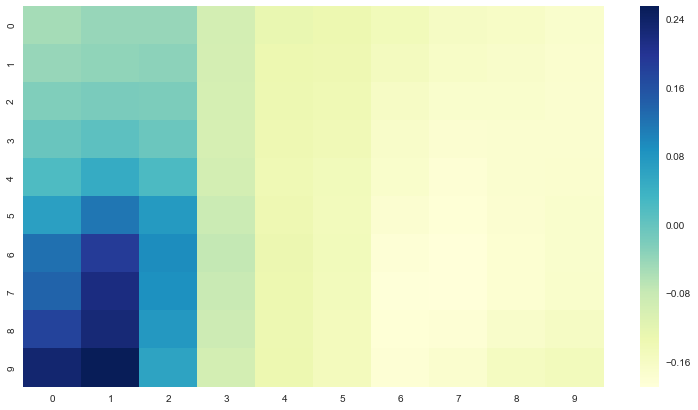

In [6]:
ax = sns.heatmap(-scores, cmap="YlGnBu")
plt.show()

In [7]:
C_idx, gamma_idx = np.unravel_index(scores.argmax(), scores.shape) # Meilleur résultat en validation
clf = svm.SVR(C=C_grid[C_idx], gamma=gamma_grid[gamma_idx])
print(C_grid[C_idx], gamma_grid[gamma_idx])
clf.fit(X_train, y_train) 
err_test = clf.score(X_test, y_test)

46.4158883361 0.035938136638


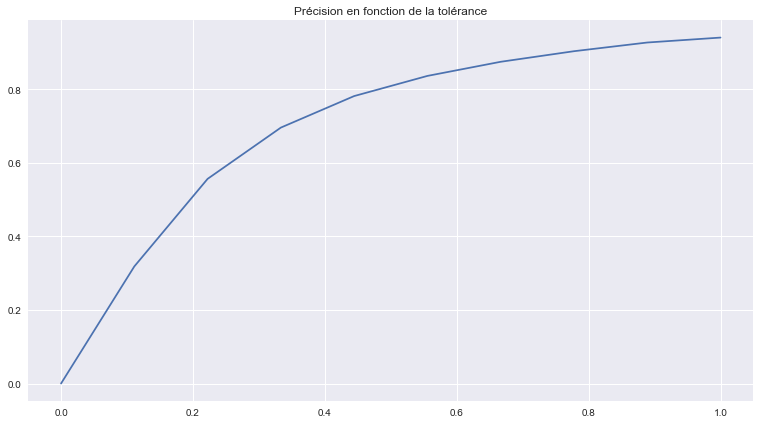

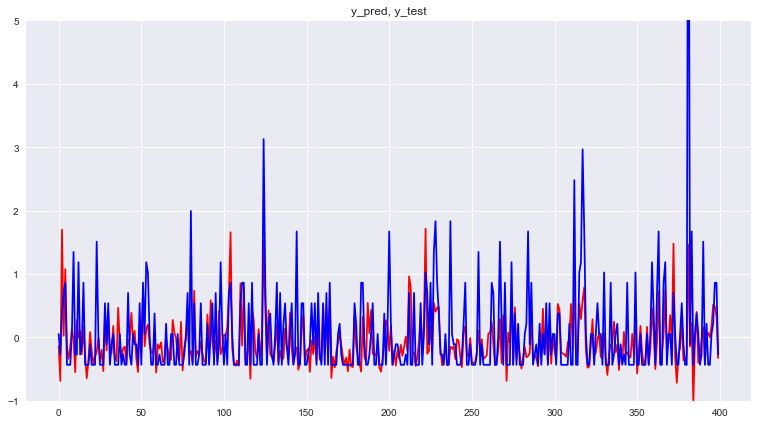

In [10]:
y_pred = clf.predict(X_test)
tolerances = np.linspace(0, 1, 10)
acc = []
for tol in tolerances:
    acc.append(np.sum(np.abs(y_pred.flatten() - y_test.flatten()) <= tol) / len(y_test))
    
plt.figure()
plt.title('Précision en fonction de la tolérance')
plt.plot(tolerances, acc)
plt.show()

plt.figure()
plt.title('y_pred, y_test')
plt.ylim(ymax=5)
plt.ylim(ymin=-1)

plt.plot(y_pred[:400], '-r')
plt.plot(y_test[:400], '-b')
np.savetxt('out/svr_preds.out', (y_test, y_pred))   # x,y,z equal sized 1D arrays

plt.show()


In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [12]:
def baseline_model(dense_size, input_dim, loss_function, optimizer):
    # create model
    model = Sequential()
    model.add(Dense(dense_size, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss=loss_function, optimizer=optimizer)
    model.summary()
    return model

In [13]:
p = 5
input_dim = 18
models_info = {
    'models': {},
    'loss_function': 'mse',
    'optimizer': 'adagrad',
    'name': '1 Layer: {} neurons'
}
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, mode='auto', patience=3)
tolerances = np.linspace(0, 1, 10)

for i in range(p):
    info_dict = {}

    model = baseline_model(2**(i+1), input_dim, 'mse', 'adagrad')
    history = model.fit(X_train, y_train, batch_size=5, epochs=100, validation_data=(X_valid, y_valid), callbacks=[early_stopping], verbose=0)
    info_dict['loss'] = history.history['loss']
    info_dict['val_loss'] = history.history['val_loss']
    
    info_dict['score'] = model.evaluate(X_test, y_test, batch_size=5)
    y_pred = model.predict(X_test)
    acc = []
    for tol in tolerances:
        y_tol = tol*y_train.flatten()
        accur = np.sum(np.abs(y_pred.flatten() - y_test.flatten()) <= tol) / len(y_test)
        acc.append(accur)
    info_dict['accuracies'] = acc
    models_info['models'][2**(i+1)] = info_dict

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 38        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
Epoch 00017: early stopping
3390/3720 [==========================>...] - ETA: 0s_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 76        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
Epoc

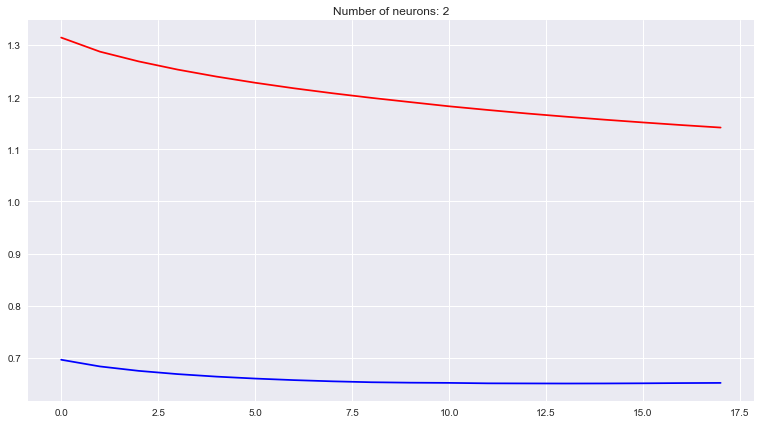

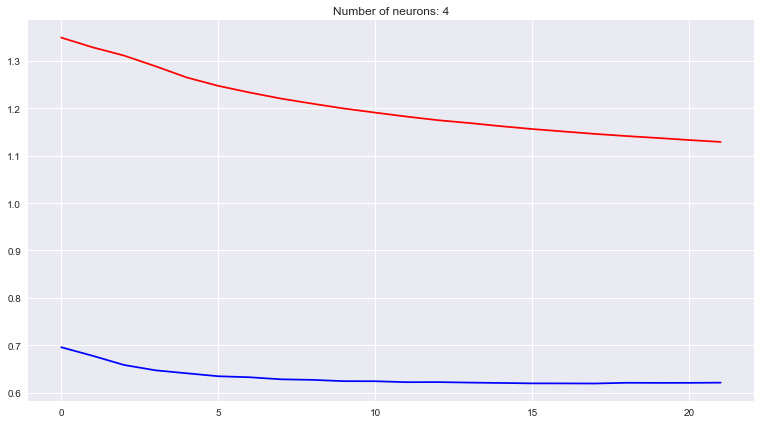

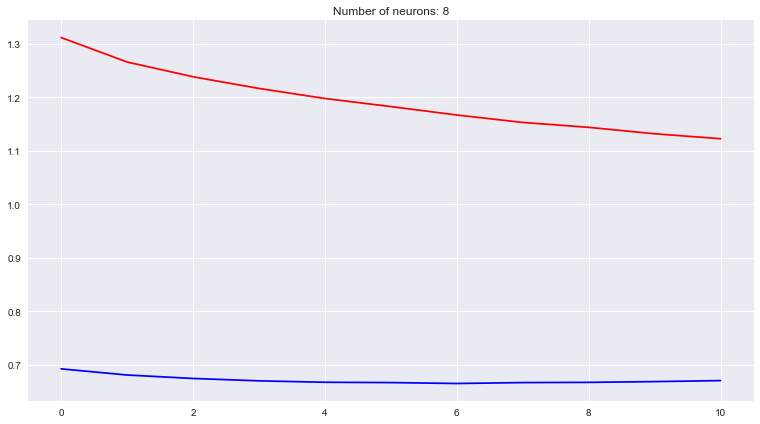

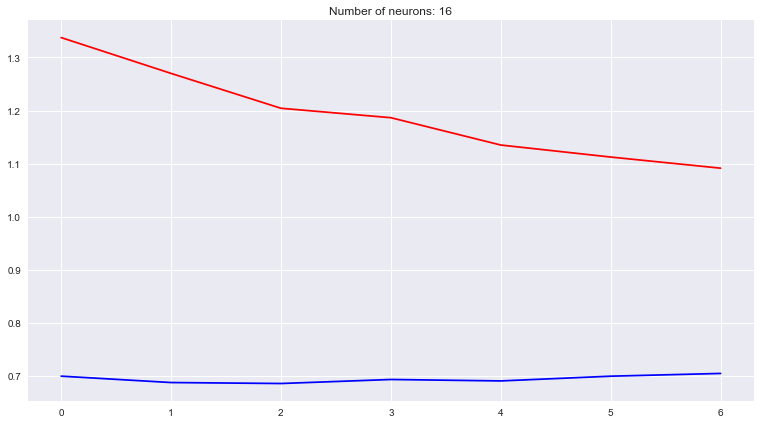

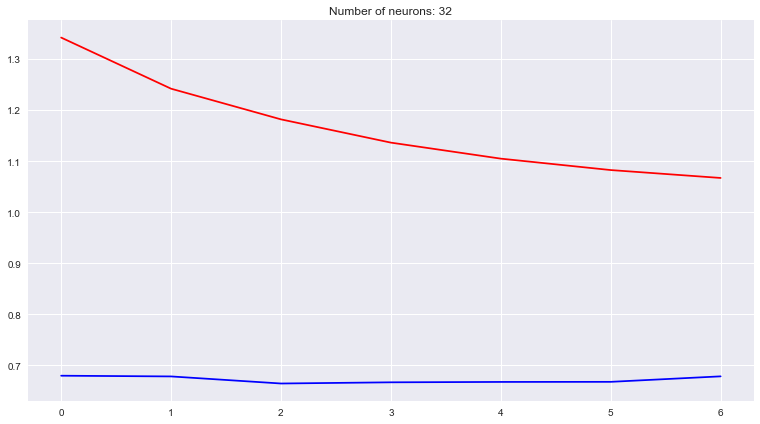

In [14]:
nb_models = len(models_info)
for nb_neurons, info_dict in models_info['models'].items():
    plt.plot(info_dict['loss'], 'r-')
    plt.plot(info_dict['val_loss'], 'b-')
    plt.title('Number of neurons: {}'.format(str(nb_neurons)))
    plt.show()

In [37]:
input_dim = 18
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, mode='auto', patience=5)
tolerances = np.linspace(0, 1, 10)
model = baseline_model(16, input_dim, 'mse', 'adagrad')
hist = model.fit(X_train, y_train, batch_size=5, epochs=1000, validation_data=(X_valid, y_valid), callbacks=[early_stopping], verbose=1)


y_pred = model.predict(X_test)
acc = []
for tol in tolerances:
    y_tol = tol*y_train.flatten()
    accur = np.sum(np.abs(y_pred.flatten() - y_test.flatten()) <= tol) / len(y_test)
    acc.append(accur)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 16)                304       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Train on 7439 samples, validate on 3719 samples
Epoch 1/1000
7430/7439 [============================>.] - ETA: 0s - loss: 94.2965

KeyboardInterrupt: 

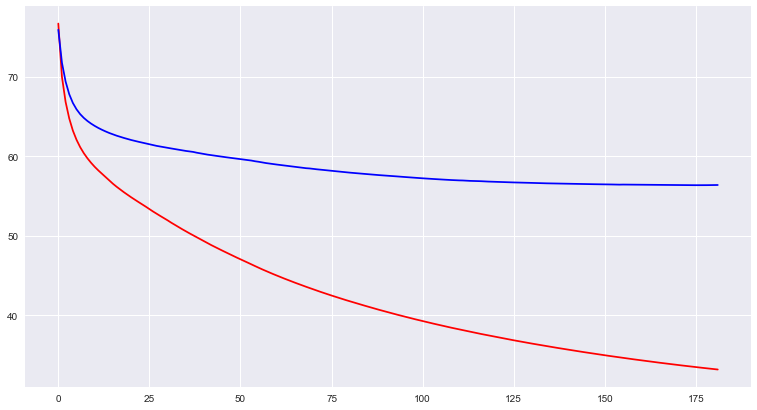

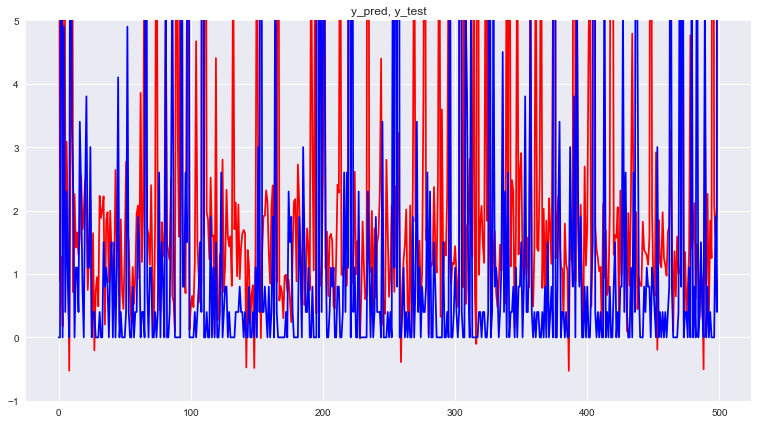

In [36]:
plt.plot(hist.history['loss'], 'r-')
plt.plot(hist.history['val_loss'], 'b-')
plt.show()

plt.title('y_pred, y_test')
plt.ylim(ymax=5)
plt.ylim(ymin=-1)
plt.plot(y_pred[:500], '-r')
plt.plot(y_test[:500], '-b')
np.savetxt('out/nn_preds_without_so2.out', (y_test, y_pred[:, 0]))   # x,y,z equal sized 1D arrays

plt.show()

In [40]:
X_train[:].shape

(7439, 18)